In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressMessages(require(reshape))
suppressMessages(library(gridExtra))
suppressMessages(library(RColorBrewer))
suppressMessages(library(ggpubr))
suppressWarnings(suppressMessages(library(viridis)))
options(repr.plot.width=15, repr.plot.height=7.5)

Warning message:
"package 'reshape' was built under R version 4.2.1"
Warning message:
"package 'gridExtra' was built under R version 4.2.1"
Warning message:
"package 'ggpubr' was built under R version 4.2.1"


Warning message:
"package 'unikn' was built under R version 4.2.2"
Welcome to unikn (v0.7.0)!

unikn.guide() opens user guides.



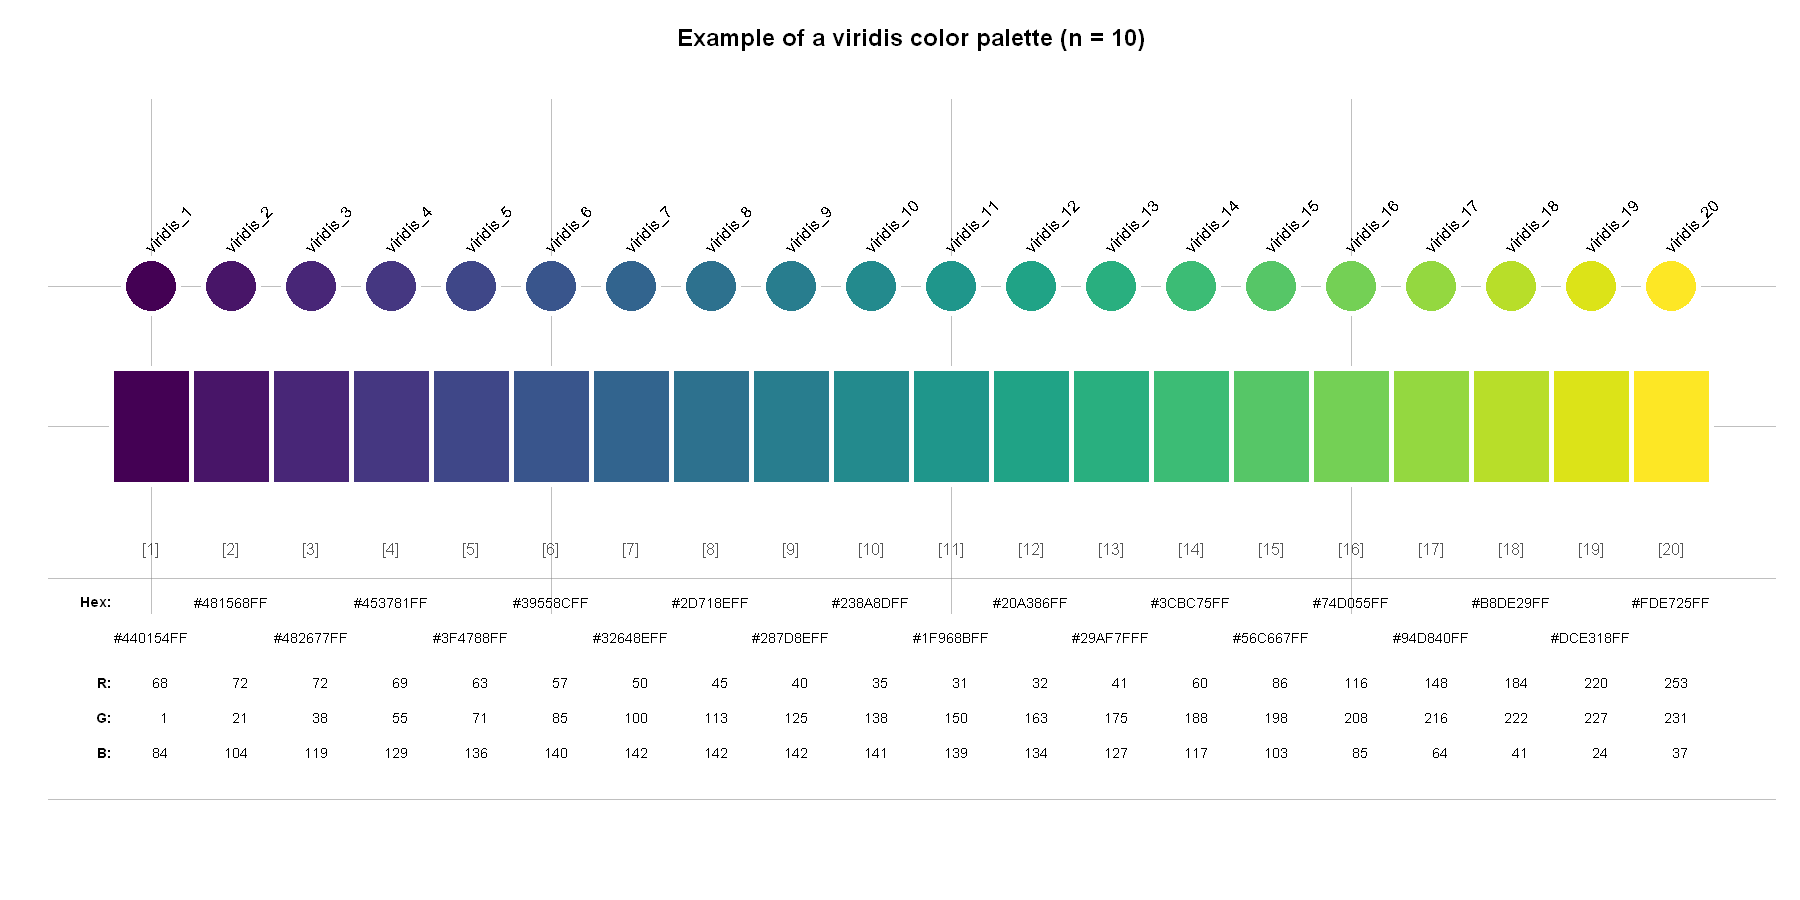

In [2]:
library(viridisLite)
library(unikn) # load package

vir_10 <- viridis(n = 20)
seecol(vir_10, col_brd = "white", lwd_brd = 4, hex=TRUE,
       title = "Example of a viridis color palette (n = 10)",
       pal_names = paste0("viridis_", 1:20))

In [3]:
df1 <- read.table("../../../reports/Master Table/RESULTS_FDR_LASTLEVELONLY_v2.TAB",header=TRUE)
gene <- read.csv("../../../../PNAS/DATA/CCNA_ref.csv",header=TRUE,fill=TRUE)
head(gene)

,locus_tag,cc_tag,geneID,protein_id,description
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCNA_00001,CC_0001,NA,YP_002515376.1,ATP/GTP-binding protein
2,CCNA_00002,CC_0002,NA,YP_002515377.1,septum formation protein Maf
3,CCNA_00003,CC_0003,NA,YP_002515378.1,shikimate 5-dehydrogenase
4,CCNA_00004,CC_0004,NA,YP_002515379.1,dephospho-CoA kinase
5,CCNA_00005,CC_0005,dnaQ,NA,NA
6,CCNA_00006,CC_0006,NA,YP_002515381.1,enoyl-CoA hydratase


In [4]:
pacman::p_load(here,  
               tidyverse, 
               janitor, # Cleaning column names  
               scales, # Transform axis scales   
               ggrepel) # Optimise plot label separation  

In [5]:
unique(df1$strain)

[1] "DCLPA"     "DCLPB"     "DLON"      "dnak-dnaJ" "wild-type"

In [6]:
unique(df1$condition)

[1] "canavanine"         "heat"               "oxidative-peroxide"

In [7]:
unique(df1$slevel)

[1] "HIGH"   "LOW"    "MEDIUM"

In [26]:
wt_df <- df1%>%filter(strain=="DLON"& condition=="heat" & slevel=="HIGH")%>%mutate(logp=-log10(fdr_UC),effect=Effect_UC)%>%select(locus_tag,effect,logp,Annotation_UC)%>%filter(Annotation_UC!="Conditionally_Essential")%>%filter(Annotation_UC!="Essential")

In [27]:
labels <- merge(wt_df,gene,by="locus_tag")%>%filter(logp>3)%>%filter(geneID!="NA")

In [28]:
library("latex2exp")
options(repr.plot.width=7.5, repr.plot.height=7.5)
cols <- c("Conditionally_Detrimental" = "#26828EFF", "Conditionally_Beneficial" = "#482878FF", "Conditionally_Neutral" = "grey")
sizes <- c("Conditionally_Beneficial" = 6, "Conditionally_Detrimental" = 6, "Conditionally_Neutral" = 3) 
alphas <- c("Conditionally_Beneficial" = 1, "Conditionally_Detrimental" = 1, "Conditionally_Neutral" = 0.5)

p2 <- wt_df %>%
  ggplot(aes(x = effect,
             y = logp,
             fill = Annotation_UC,    
             size = Annotation_UC,
             alpha = Annotation_UC)) + 
  geom_point(shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_size_manual(values = sizes)+scale_alpha_manual(values = alphas) +scale_x_continuous(breaks = c(seq(-3, 3, 0.5)),       
                     limits = c(-3, 3))  +scale_fill_manual(values = cols) +ggpubr::theme_classic2()+scale_fill_manual(values = cols) +ggpubr::theme_classic2()+geom_label_repel(data = labels, # Add labels last to appear as the top layer  
                   aes(label =geneID),
                   force = 2,
                   nudge_y = 1,size = 6, point.padding = 0.3, box.padding = 0.5,fontface = 'italic', color="white", segment.color="black")+theme(legend.position="none")+labs(x = "GLM Coefficient", 
                   y = bquote( '-log'[10]*'(p-value)')) +theme(axis.title.x =  element_text(size = 15),axis.title.y = element_text(size = 16),
                                                              axis.text.x =  element_text(size = 13),axis.text.y = element_text(size = 13))+
ggtitle(unname(TeX(" $ \\Delta lon$ | Heat | High")))+theme(plot.title = element_text(size = 20, face = "bold"))


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [29]:
table(wt_df$Annotation_UC)


 Conditionally_Beneficial Conditionally_Detrimental     Conditionally_Neutral 
                      110                       168                      3090 

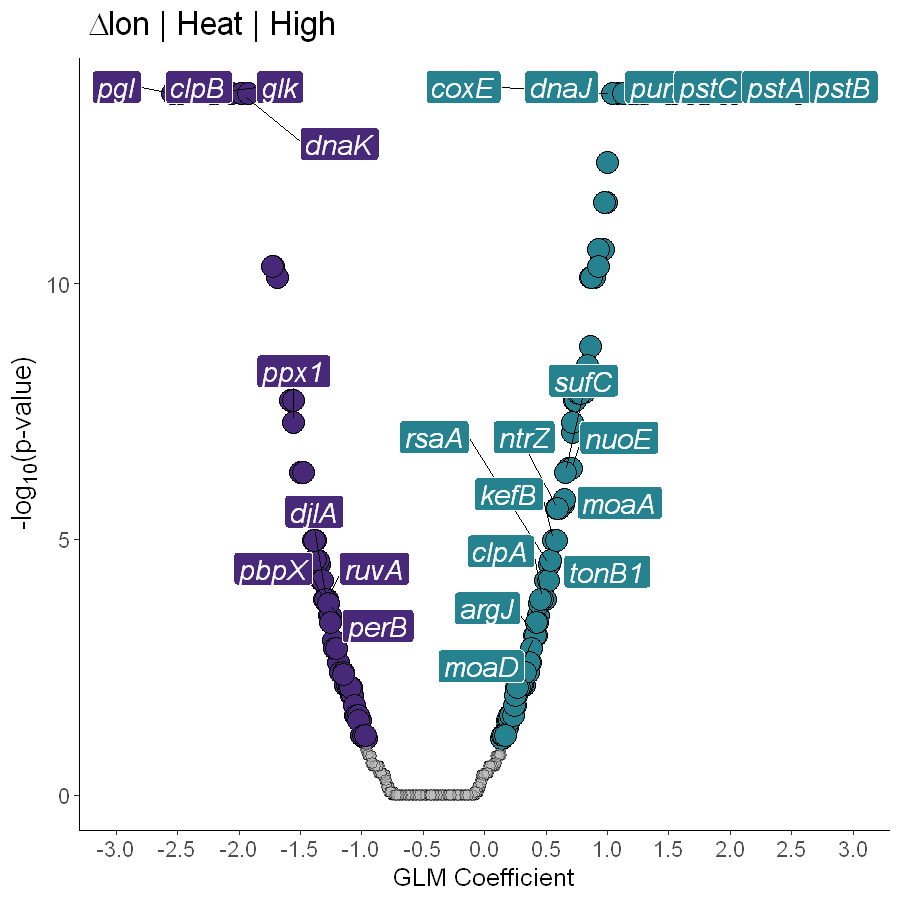

In [30]:
p2

In [31]:
wt_df <- df1%>%filter(strain=="DLON"& condition=="heat" & slevel=="MEDIUM")%>%mutate(logp=-log10(fdr_UC),effect=Effect_UC)%>%select(locus_tag,effect,logp,Annotation_UC)%>%filter(Annotation_UC!="Conditionally_Essential")%>%filter(Annotation_UC!="Essential")

In [32]:
labels <- merge(wt_df,gene,by="locus_tag")%>%filter(logp>3)%>%filter(geneID!="NA")

In [33]:
table(wt_df$Annotation_UC)


 Conditionally_Beneficial Conditionally_Detrimental     Conditionally_Neutral 
                       35                        25                      3351 

In [34]:
options(repr.plot.width=7.5, repr.plot.height=7.5)
cols <- c("Conditionally_Detrimental" = "#26828EFF", "Conditionally_Beneficial" = "#482878FF", "Conditionally_Neutral" = "grey")
sizes <- c("Conditionally_Beneficial" = 6, "Conditionally_Detrimental" = 6, "Conditionally_Neutral" = 3) 
alphas <- c("Conditionally_Beneficial" = 1, "Conditionally_Detrimental" = 1, "Conditionally_Neutral" = 0.5)

p1 <- wt_df %>%
  ggplot(aes(x = effect,
             y = logp,
             fill = Annotation_UC,    
             size = Annotation_UC,
             alpha = Annotation_UC)) + 
  geom_point(shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_size_manual(values = sizes)+scale_alpha_manual(values = alphas) +scale_x_continuous(breaks = c(seq(-3, 3, 0.5)),       
                     limits = c(-3, 3))  +scale_fill_manual(values = cols) +ggpubr::theme_classic2()+scale_fill_manual(values = cols) +ggpubr::theme_classic2()+geom_label_repel(data = labels, # Add labels last to appear as the top layer  
                   aes(label = geneID),
                   force = 2,
                   nudge_y = 1,size = 6, point.padding = 0.3, box.padding = 0.5,fontface = 'italic', color="white", segment.color="black")+theme(legend.position="none")+labs(x = "GLM Coefficient", 
                   y = bquote( '-log'[10]*'(p-value)')) +theme(axis.title.x =  element_text(size = 15),axis.title.y = element_text(size = 16),
                                                              axis.text.x =  element_text(size = 13),axis.text.y = element_text(size = 13))+ggtitle(unname(TeX(" $ \\Delta lon$ | Heat | Medium")))+theme(plot.title = element_text(size = 20, face = "bold"))



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


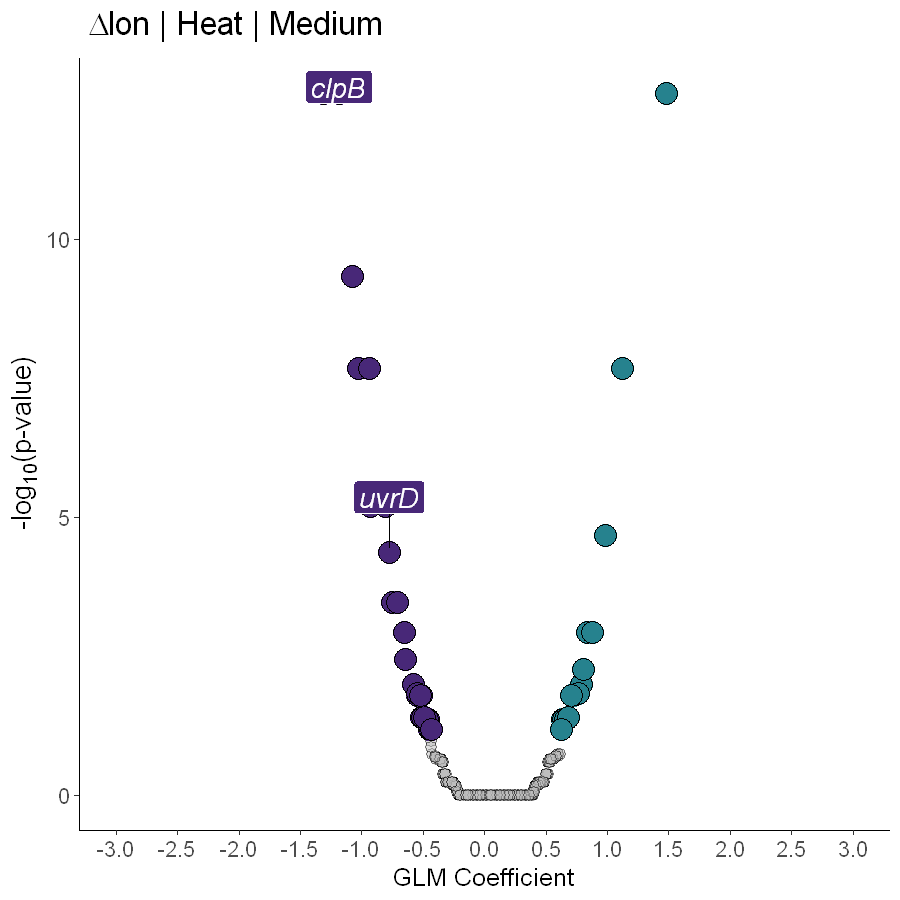

In [35]:
p1

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


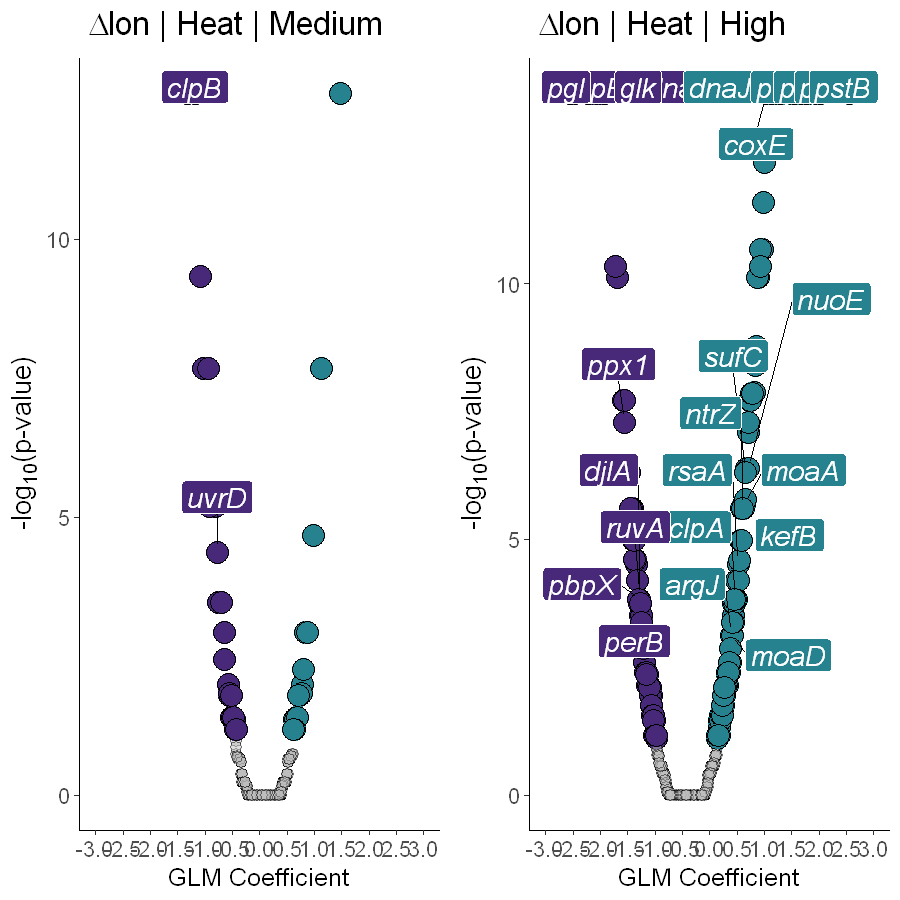

In [37]:
p <- grid.arrange(p1, p2, ncol=2, nrow = 1)
ggsave(filename = "../../../../PNAS//FIGURES//Fig-2c.jpeg", device = "jpeg",  plot = p, width = 10, height = 7.5, dpi = 600, units = "in")

In [104]:
dkj_df <- df1%>%filter(strain=="wild-type"& condition=="heat" & slevel=="MEDIUM")%>%mutate(logp=-log10(fdr_UC),effect=Effect_UC)%>%select(locus_tag,effect,logp,Annotation_UC)%>%filter(Annotation_UC!="Conditionally_Essential")%>%filter(Annotation_UC!="Essential")

In [105]:
labels <- merge(dkj_df,gene,by="locus_tag")%>%filter(logp>2)%>%filter(locus_tag!=Name)

In [106]:
table(dkj_df$Annotation_UC)


 Conditionally_Beneficial Conditionally_Detrimental     Conditionally_Neutral 
                       42                       159                      3262 

In [107]:
options(repr.plot.width=10, repr.plot.height=7)
cols <- c("Conditionally_Detrimental" = "#26828EFF", "Conditionally_Beneficial" = "#482878FF", "Conditionally_Neutral" = "grey") 
sizes <- c("Conditionally_Beneficial" = 4, "Conditionally_Detrimental" = 4, "Conditionally_Neutral" = 2) 
alphas <- c("Conditionally_Beneficial" = 1, "Conditionally_Detrimental" = 1, "Conditionally_Neutral" = 0.5)

p3 <- dkj_df %>%
  ggplot(aes(x = effect,
             y = logp,
             fill = Annotation_UC,    
             size = Annotation_UC,
             alpha = Annotation_UC)) + 
  geom_point(shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_size_manual(values = sizes)+scale_alpha_manual(values = alphas) +scale_x_continuous(breaks = c(seq(-3, 3, 0.5)),       
                     limits = c(-3, 3))  +scale_fill_manual(values = cols) +ggpubr::theme_classic2()+geom_label_repel(data = labels, # Add labels last to appear as the top layer  
                   aes(label = Name),
                   force = 2,
                   nudge_y = 1) +theme(legend.position="none")

Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


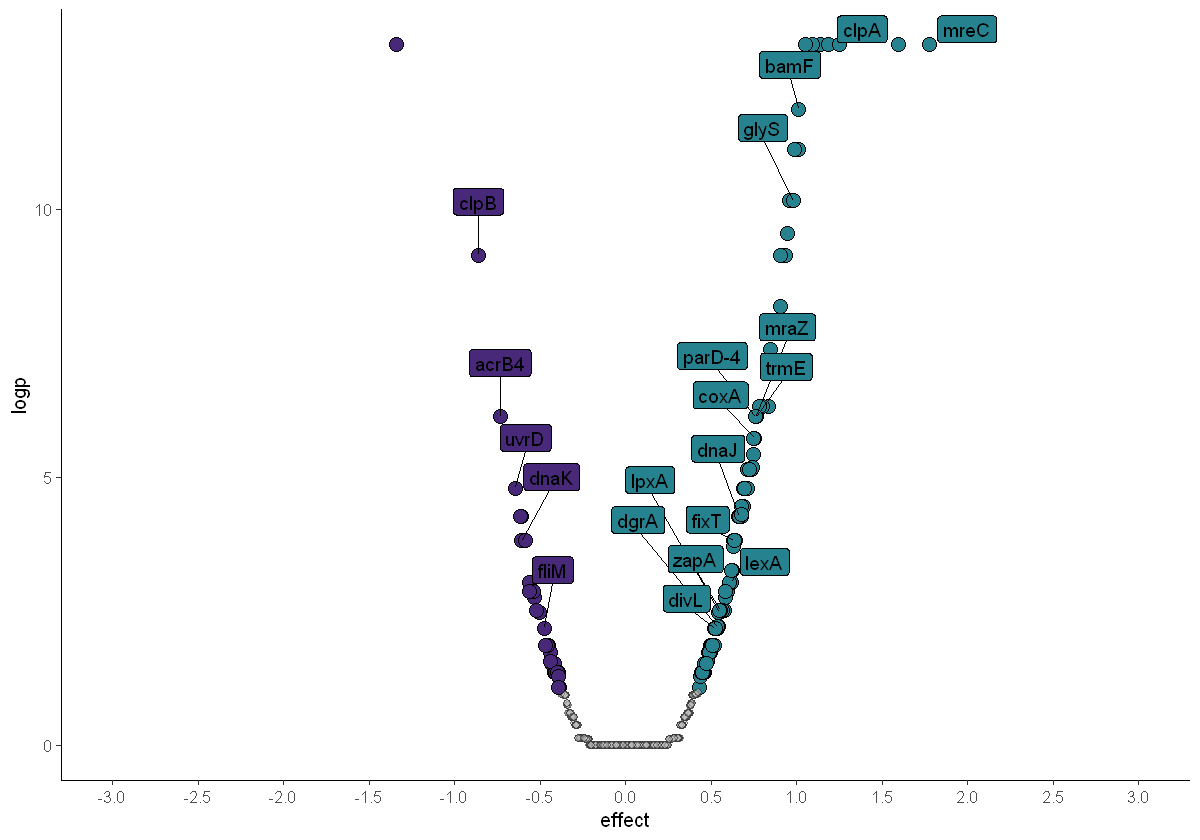

In [108]:
p3

In [109]:
dkj_df <- df1%>%filter(strain=="dnak-dnaJ"& condition=="heat" & slevel=="MEDIUM")%>%mutate(logp=-log10(fdr_UC),effect=Effect_UC)%>%select(locus_tag,effect,logp,Annotation_UC)%>%filter(Annotation_UC!="Conditionally_Essential")%>%filter(Annotation_UC!="Essential")

In [110]:
labels <- merge(dkj_df,gene,by="locus_tag")%>%filter(logp>2)%>%filter(locus_tag!=Name)

In [111]:
table(dkj_df$Annotation_UC)


 Conditionally_Beneficial Conditionally_Detrimental     Conditionally_Neutral 
                       57                        54                      2821 

In [112]:
options(repr.plot.width=10, repr.plot.height=7)
cols <- c("Conditionally_Detrimental" = "#26828EFF", "Conditionally_Beneficial" = "#482878FF", "Conditionally_Neutral" = "grey") 
sizes <- c("Conditionally_Beneficial" = 4, "Conditionally_Detrimental" = 4, "Conditionally_Neutral" = 2) 
alphas <- c("Conditionally_Beneficial" = 1, "Conditionally_Detrimental" = 1, "Conditionally_Neutral" = 0.5)

p4 <- dkj_df %>%
  ggplot(aes(x = effect,
             y = logp,
             fill = Annotation_UC,    
             size = Annotation_UC,
             alpha = Annotation_UC)) + 
  geom_point(shape = 21, # Specify shape and colour as fixed local parameters    
             colour = "black") + scale_size_manual(values = sizes)+scale_alpha_manual(values = alphas) +scale_x_continuous(breaks = c(seq(-3, 3, 0.5)),       
                     limits = c(-3, 3))  +scale_fill_manual(values = cols) +ggpubr::theme_classic2()+geom_label_repel(data = labels, # Add labels last to appear as the top layer  
                   aes(label = Name),
                   force = 2,
                   nudge_y = 1) +theme(legend.position="none")

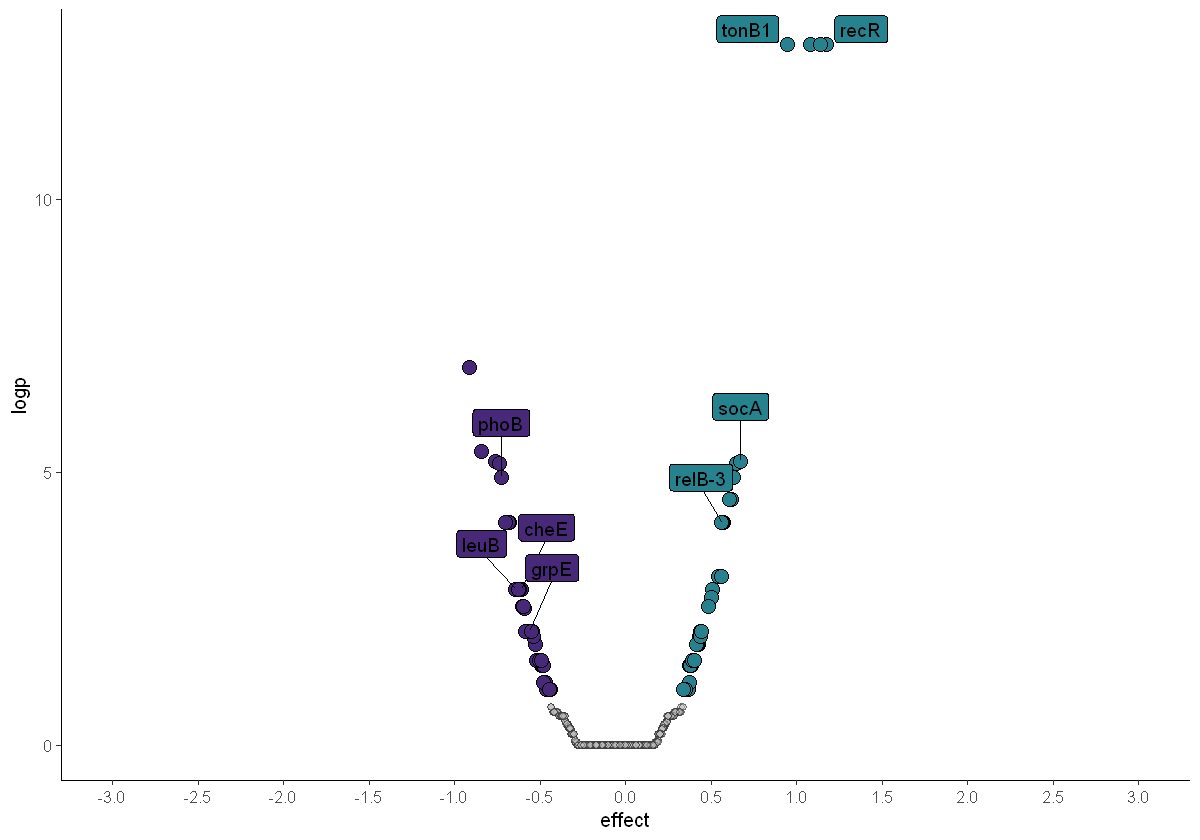

In [113]:
p4

Warning message:
"Removed 1 rows containing missing values (geom_point)."


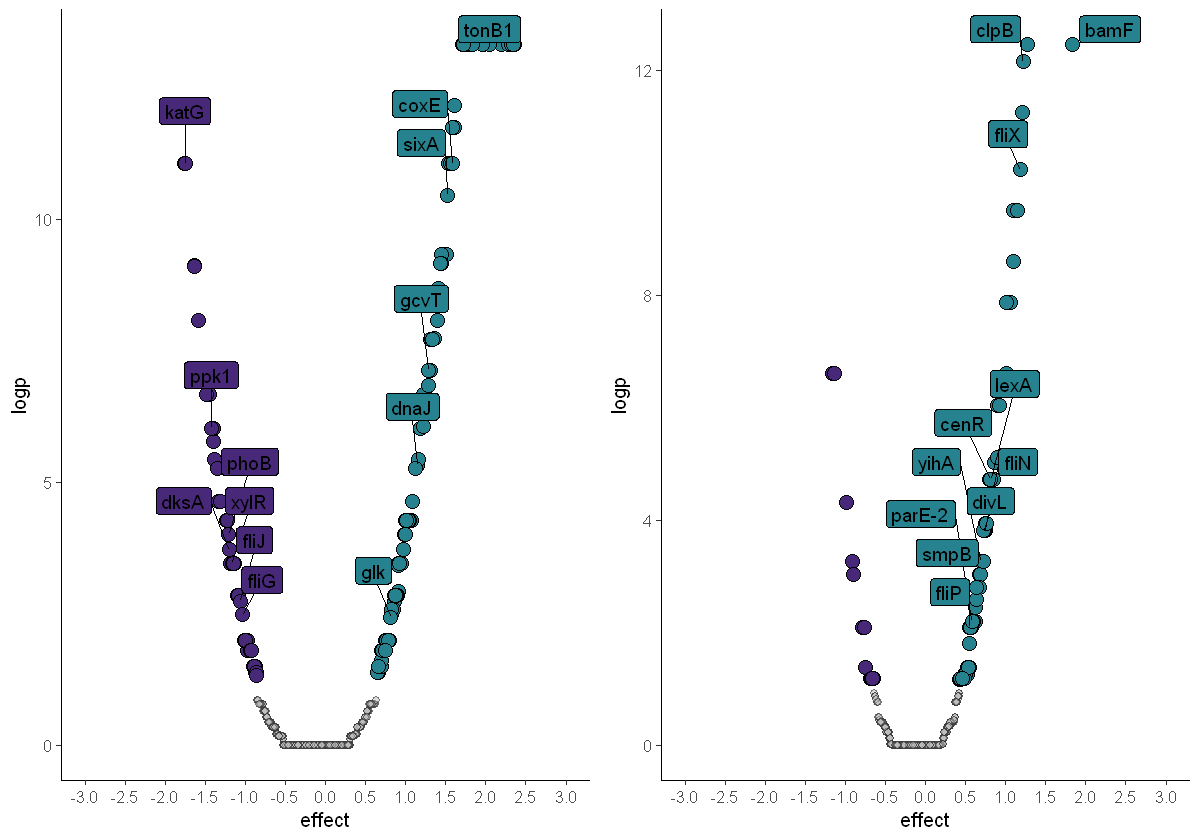

In [91]:
p <- grid.arrange(p2, p3, ncol=2, nrow = 1)
ggsave(filename = "../../reports/Master Table/Fig6b.jpeg", device = "jpeg",  plot = p, width = 15, height = 10, dpi = 600, units = "in")